In [9]:
import zntrack
import matplotlib.pyplot as plt
import numpy as np

In [4]:
vs_0 = zntrack.from_rev("AL_0_BoxScale")
vs_1 = zntrack.from_rev("AL_1_BoxScale")
vs_2 = zntrack.from_rev("AL_2_BoxScale")
vs_3 = zntrack.from_rev("AL_3_BoxScale")
vs_4 = zntrack.from_rev("AL_4_BoxScale")
vs_5 = zntrack.from_rev("AL_5_BoxScale")

array([0.9       , 0.91111111, 0.92222222, 0.93333333, 0.94444444,
       0.95555556, 0.96666667, 0.97777778, 0.98888889, 1.        ,
       1.01111111, 1.02222222, 1.03333333, 1.04444444, 1.05555556,
       1.06666667, 1.07777778, 1.08888889, 1.1       , 1.11111111,
       1.12222222, 1.13333333, 1.14444444, 1.15555556, 1.16666667,
       1.17777778, 1.18888889, 1.2       , 1.21111111, 1.22222222,
       1.23333333, 1.24444444, 1.25555556, 1.26666667, 1.27777778,
       1.28888889, 1.3       , 1.31111111, 1.32222222, 1.33333333,
       1.34444444, 1.35555556, 1.36666667, 1.37777778, 1.38888889,
       1.4       , 1.41111111, 1.42222222, 1.43333333, 1.44444444,
       1.45555556, 1.46666667, 1.47777778, 1.48888889, 1.5       ,
       1.51111111, 1.52222222, 1.53333333, 1.54444444, 1.55555556,
       1.56666667, 1.57777778, 1.58888889, 1.6       , 1.61111111,
       1.62222222, 1.63333333, 1.64444444, 1.65555556, 1.66666667,
       1.67777778, 1.68888889, 1.7       , 1.71111111, 1.72222

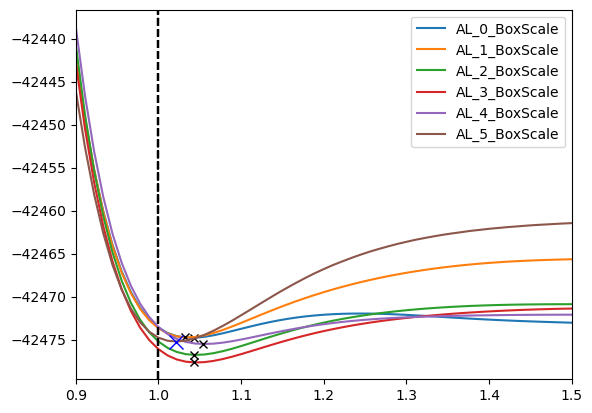

In [28]:
fig, ax = plt.subplots()

for vs in [vs_0, vs_1, vs_2, vs_3, vs_4, vs_5]:
    energies = [x.get_potential_energy() for x in vs.atoms]

    ax.plot(np.linspace(vs_0.start, vs_0.stop, vs_0.num), energies, label=vs.name)

    step = (vs_0.stop - vs_0.start) / vs_0.num
    # add a cross at the minimum
    
    # add an arrow to the one for vs_5
    if vs.name == "AL_5_BoxScale":
        ax.plot(vs_0.start + np.argmin(energies) * step, np.min(energies), 'x', color='blue', markersize=10)
    else:
        ax.plot(vs_0.start + np.argmin(energies) * step, np.min(energies), 'x', color='k')
        

    # vertical dashed line at the minimum
    # ax.axvline(vs_0.start + np.argmin(energies) * step)
    ax.axvline(1, linestyle='--', color='k')

    ax.set_xlim(0.90, 1.50)
ax.legend()

In [32]:
metrics = [
    zntrack.from_rev("AL_0_PredictionMetrics"), 
    zntrack.from_rev("AL_1_PredictionMetrics"),
    zntrack.from_rev("AL_2_PredictionMetrics"),
    zntrack.from_rev("AL_3_PredictionMetrics"),
    zntrack.from_rev("AL_4_PredictionMetrics"),
    zntrack.from_rev("AL_5_PredictionMetrics"),    
]

Text(0, 0.5, 'RMSE / eV/atom/Angstrom')

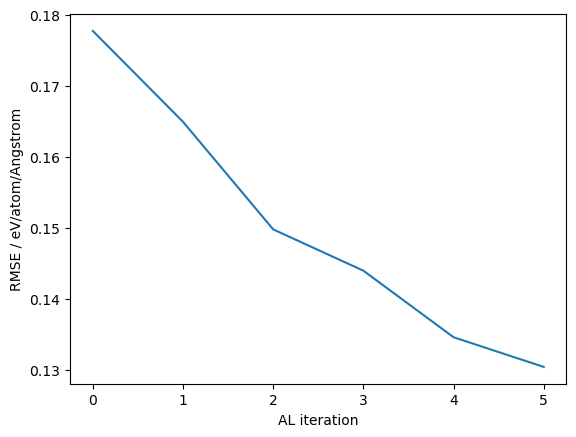

In [46]:
fig, ax = plt.subplots()
data = [x.forces["rmse"] for x in metrics]
ax.plot(data)
ax.set_xlabel("AL iteration")
ax.set_ylabel("RMSE / eV/atom/Angstrom")